## Synoptic Data Exploration
In this file I will explore a data from SynopticLabs API on weather data from the University of Utah Campus.

Firstly lets get some data from the last few months.

In [52]:
import requests
import pandas as pd
import json
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (20, 12)
plt.style.use('ggplot')

response = requests.get('https://api.synopticlabs.org/v2/stations/timeseries?&token=tk2018mar1420y8ywVx2gnEw1bc8YIV2&stid=WBB&start=201801010000&end=201803071200')

response

<Response [200]>

Great! we're getting a good response.

Now what is the type of the content so we can decode it properly?

In [53]:
response.headers['content-type']

'application/json'

In [54]:
response_json = response.content.decode('utf8')

d = json.loads(response_json)

print(type(d['UNITS']))

#save the units in case we need to do something with them
units = pd.DataFrame.from_dict(d['UNITS'], orient='index')

#get the data we want
env_data = pd.DataFrame.from_dict(d['STATION'][0]['OBSERVATIONS']).dropna()

#pares dates
env_data['date_time'] = pd.to_datetime(env_data['date_time'])

#make it a time series
env_data = env_data.set_index('date_time')

env_data

<class 'dict'>


,PM_25_concentration_set_1,air_flow_temperature_set_1,air_temp_set_1,altimeter_set_1d,dew_point_temperature_set_1d,flow_rate_set_1,internal_relative_humidity_set_1,ozone_concentration_set_1,precip_accum_one_minute_set_1,pressure_set_1,relative_humidity_set_1,sea_level_pressure_set_1d,sensor_error_code_set_1,solar_radiation_set_1,volt_set_1,wind_cardinal_direction_set_1d,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
date_time,,,,,,,,,,,,,,,,,,,,
2018-01-02 06:35:00,12.86,-3.44,-1.50,102930.42,-6.16,2.0,39.41,6.49,0.0,86259.0,70.90,103378.24,0.0,0.0,13.73,ESE,-4.54,119.00,2.45,2.27
2018-01-02 19:00:00,10.08,7.43,4.42,103425.63,-8.09,2.0,15.02,28.54,0.0,86674.0,40.14,103482.10,0.0,445.1,13.50,S,2.37,186.00,2.84,2.33
2018-01-02 20:00:00,10.18,5.57,4.44,103318.24,-7.36,2.0,14.00,31.64,0.0,86584.0,42.38,103373.33,0.0,464.1,13.43,SW,2.34,223.80,2.74,2.38
2018-01-02 22:00:00,10.21,7.74,5.68,103172.66,-7.33,2.0,14.00,27.31,0.0,86462.0,38.98,103147.71,0.0,326.3,13.39,WSW,3.84,255.70,3.04,2.34
2018-01-02 22:20:00,17.00,7.71,5.46,103166.69,-5.49,2.0,16.00,19.28,0.0,86457.0,45.55,103155.82,0.0,278.4,13.40,WSW,3.37,256.70,3.72,2.59
2018-01-02 22:40:00,20.61,7.67,5.67,103148.79,-4.57,2.0,18.00,14.83,0.0,86442.0,48.09,103124.41,0.0,231.4,13.40,WSW,3.35,255.80,3.72,2.94
2018-01-02 22:45:00,22.12,6.68,5.44,103151.18,-4.03,2.0,18.53,14.78,0.0,86444.0,50.89,103141.54,0.0,218.7,13.41,W,3.60,263.70,3.33,2.30
2018-01-02 22:50:00,23.21,6.78,5.68,103146.40,-3.88,2.0,19.28,13.37,0.0,86440.0,50.59,103121.35,0.0,205.0,13.41,WSW,3.58,258.60,3.33,2.66
2018-01-02 23:05:00,23.28,6.66,5.22,103152.37,-3.81,2.0,21.08,11.52,0.0,86445.0,52.51,103156.88,0.0,168.1,13.42,W,3.34,263.50,2.94,2.30


In [55]:
#lets look at some stats
env_data.describe()

,PM_25_concentration_set_1,air_flow_temperature_set_1,air_temp_set_1,altimeter_set_1d,dew_point_temperature_set_1d,flow_rate_set_1,internal_relative_humidity_set_1,ozone_concentration_set_1,precip_accum_one_minute_set_1,pressure_set_1,relative_humidity_set_1,sea_level_pressure_set_1d,sensor_error_code_set_1,solar_radiation_set_1,volt_set_1,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
count,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000
mean,2.390855,0.286319,1.331383,101846.795165,-6.720181,2.000005,34.707728,35.200290,0.001218,85350.885456,58.534598,102106.038633,0.010655,110.943700,13.586886,-2.270812,199.381196,5.048122,3.698522
std,3.695133,4.245224,3.834327,794.596645,4.105016,0.000326,8.170275,7.660306,0.017548,665.897468,19.463713,829.737294,0.652849,181.146303,0.110766,4.572187,110.309524,2.278270,1.532855
min,0.000000,-13.070000,-10.220000,99566.590000,-18.050000,2.000000,10.000000,3.620000,0.000000,83440.000000,21.500000,99789.030000,0.000000,0.000000,13.330000,-14.900000,0.050000,2.450000,2.240000
25%,0.880000,-3.457500,-1.787500,101262.230000,-10.187500,2.000000,31.000000,32.672500,0.000000,84861.000000,43.900000,101509.027500,0.000000,0.000000,13.500000,-5.860000,78.210000,3.430000,2.620000
50%,1.260000,0.775000,1.695000,101849.320000,-6.250000,2.000000,37.710000,37.240000,0.000000,85353.000000,54.750000,102205.260000,0.000000,1.810000,13.580000,-1.950000,230.650000,4.410000,3.180000
75%,2.550000,4.027500,4.810000,102510.985000,-3.530000,2.000000,40.000000,39.990000,0.000000,85907.500000,72.107500,102745.740000,0.000000,161.975000,13.670000,1.700000,296.375000,5.880000,4.237500
max,49.000000,10.320000,7.220000,103669.060000,4.490000,2.020000,48.000000,46.530000,0.254000,86878.000000,97.600000,103725.500000,40.000000,958.000000,13.950000,5.690000,359.700000,17.340000,12.630000


In [56]:
#which data entries are correlated
corr_mat = env_data.corr()

In [57]:
#I can use this to find relationships in the data that are described theoretically by equations and verify our intuition with theory
corr_mat[(corr_mat >= 0.4) | (corr_mat <= -0.4)]

,PM_25_concentration_set_1,air_flow_temperature_set_1,air_temp_set_1,altimeter_set_1d,dew_point_temperature_set_1d,flow_rate_set_1,internal_relative_humidity_set_1,ozone_concentration_set_1,precip_accum_one_minute_set_1,pressure_set_1,relative_humidity_set_1,sea_level_pressure_set_1d,sensor_error_code_set_1,solar_radiation_set_1,volt_set_1,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
PM_25_concentration_set_1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.557815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
air_flow_temperature_set_1,NaN,1.000000,0.965450,NaN,NaN,NaN,-0.428922,NaN,NaN,NaN,-0.509065,NaN,NaN,NaN,-0.933462,0.950178,NaN,NaN,NaN
air_temp_set_1,NaN,0.965450,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.508667,NaN,NaN,NaN,-0.909432,0.981447,NaN,NaN,NaN
altimeter_set_1d,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.952672,NaN,NaN,NaN,NaN,-0.406235,NaN,NaN
dew_point_temperature_set_1d,NaN,NaN,NaN,NaN,1.000000,NaN,0.579842,NaN,NaN,NaN,0.627553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow_rate_set_1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
internal_relative_humidity_set_1,NaN,-0.428922,NaN,NaN,0.579842,NaN,1.000000,NaN,NaN,NaN,0.723205,NaN,NaN,-0.722362,0.405238,NaN,NaN,NaN,NaN
ozone_concentration_set_1,-0.557815,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precip_accum_one_minute_set_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure_set_1,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.952672,NaN,NaN,NaN,NaN,-0.406235,NaN,NaN


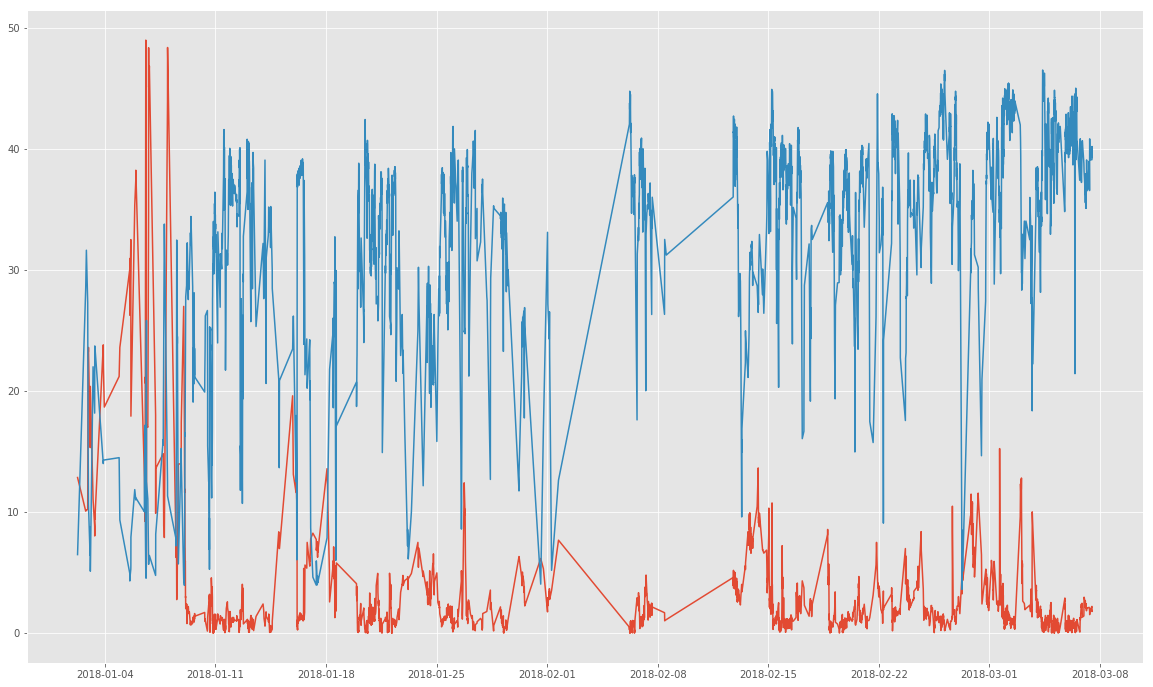

In [58]:
#PM2.5 is an interesting topic and it is moderately negatively correlated with Ozone concentration lets plot the values
plt.plot(env_data['PM_25_concentration_set_1'])
plt.plot(env_data['ozone_concentration_set_1']);

It looks a bit messy and jumpy. Lets look at a smaller subset of the dates say just Feburary.

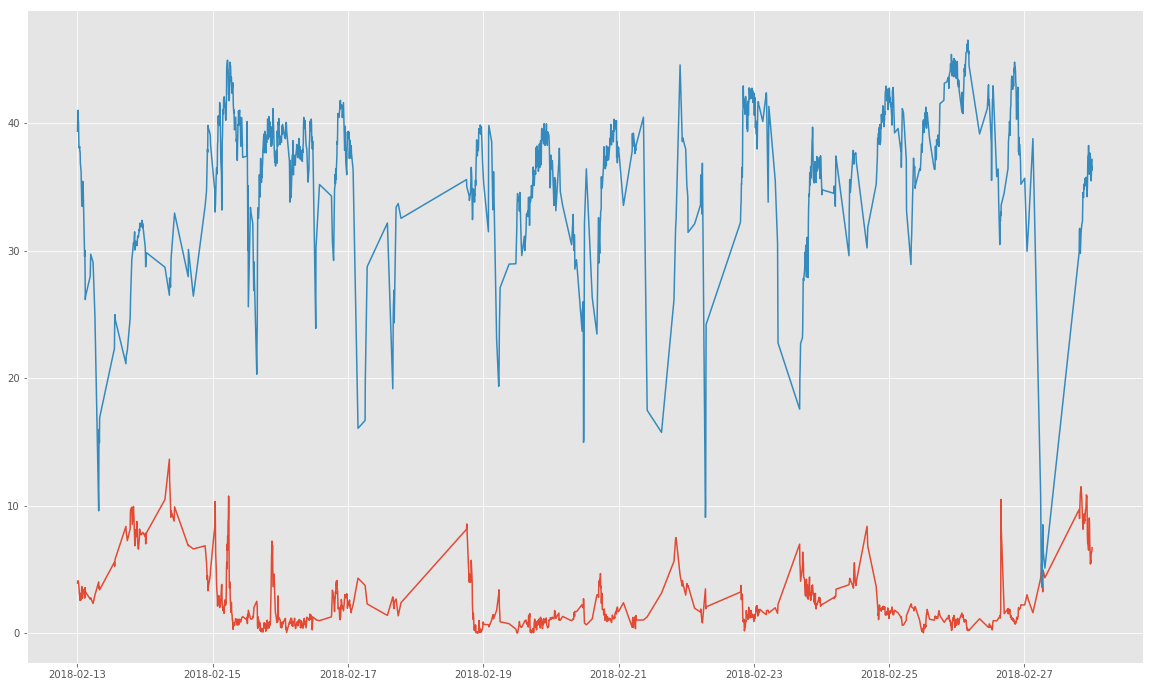

In [59]:
import datetime as dt

start_date = dt.date(2018, 2, 13)
end_date = dt.date(2018, 2, 28)

plt.plot(env_data[start_date:end_date]['PM_25_concentration_set_1'])
plt.plot(env_data[start_date:end_date]['ozone_concentration_set_1']);

There are a few places where you can see the negative correlation. Let's look at something with hihger correaltion and do some regression on it. Lets look at wind chill and air temp.

Text(0.5,1,'Air Temp vs Wind Chill')

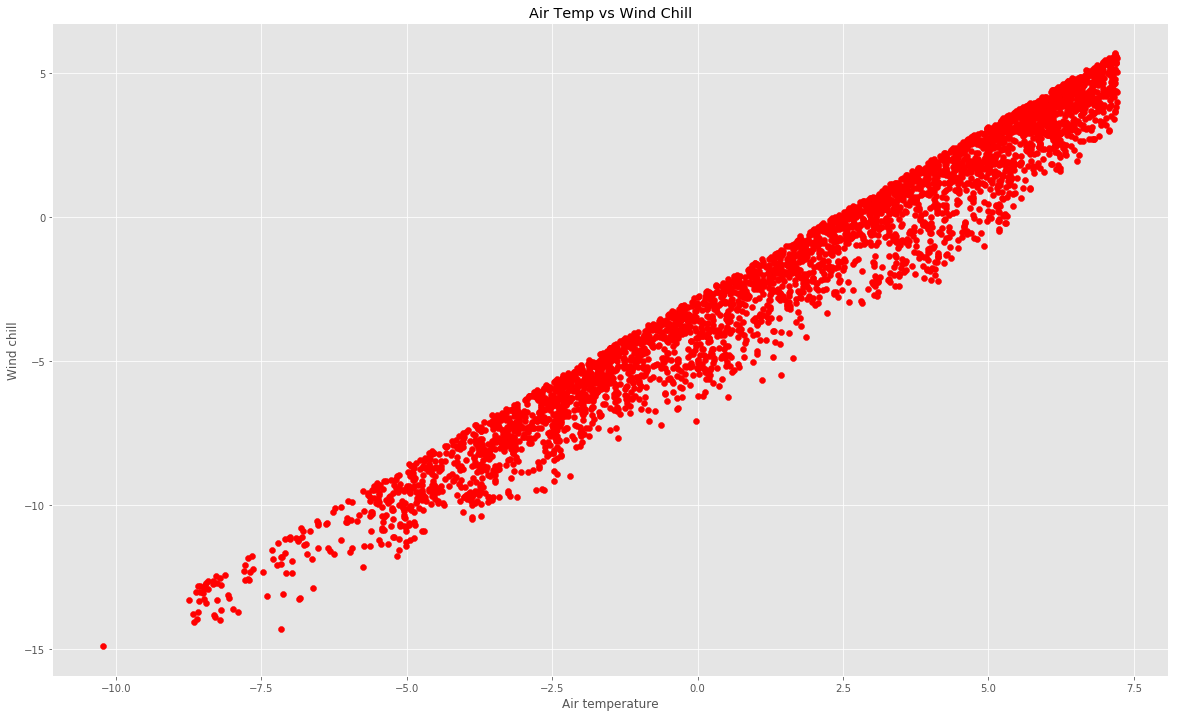

In [60]:
air_temp = env_data['air_temp_set_1']
chill = env_data['wind_chill_set_1d']

plt.scatter(air_temp, chill,c = 'r')
plt.xlabel('Air temperature')
plt.ylabel('Wind chill');
plt.title('Air Temp vs Wind Chill')

As one would expect we can see the high correlation.

In [61]:
#regression, can we predict the windchill based off of the air temp
import statsmodels.formula.api as sm

temp_ols = sm.ols('wind_chill_set_1d ~ air_temp_set_1', env_data).fit()

temp_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      wind_chill_set_1d   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 9.831e+04
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:32:06   Log-Likelihood:                -4832.0
No. Observations:                3754   AIC:                             9668.
Df Residuals:                    3752   BIC:                             9680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.8289      0.015   -252.766      0.000      -3.859      -3.799
air_temp_set_1     1.1703      0.004    313.543      0.000       1.163       1.178
==============================================================================
Omnibus:                      433.167   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.283
Skew:                          -0.961   Prob(JB):                    8.98e-130
Kurtosis:                       3.329   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model captures 96% of the variance in the data which is really good. The f-statistic and t-tests show that the model is quite accurate. The realtionship is nearly 1:1.

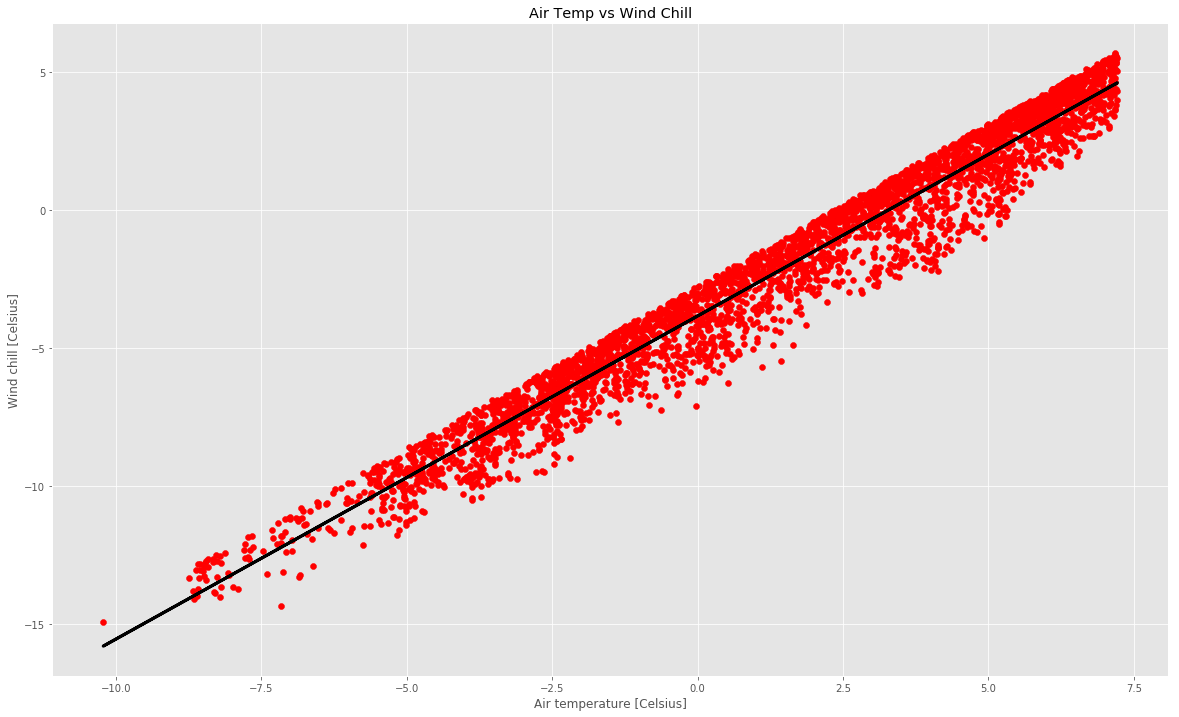

In [62]:
plt.scatter(air_temp, chill,c = 'r')
plt.plot(air_temp, temp_ols.predict(), linewidth = 3, c = 'k')
plt.xlabel('Air temperature [Celsius]')
plt.ylabel('Wind chill [Celsius]');
plt.title('Air Temp vs Wind Chill');

#print(units)

Now I think it would be interesting to look at pressure vs solar and the air temp in one plot.

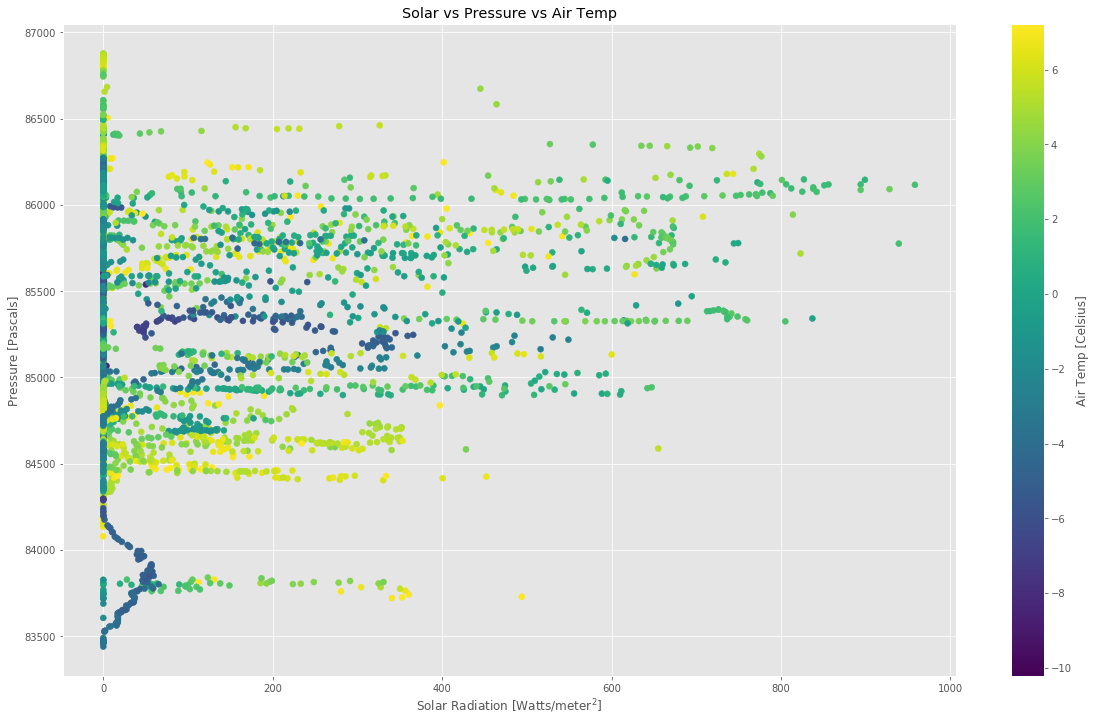

In [63]:
solar = env_data['solar_radiation_set_1']
pressure = env_data['pressure_set_1']

air_sol_pre = plt.scatter(solar, pressure, c=air_temp)
plt.title('Solar vs Pressure vs Air Temp')
plt.xlabel('Solar Radiation [Watts/meter$^2$]')
plt.ylabel('Pressure [Pascals]')
plt.colorbar(air_sol_pre, label ='Air Temp [Celsius]');

Clearly there are more variable to consider to accurately access the temperature of a few moths during the winter. However there are a few trends that you can notice, and there may be dependence upon past days that the plot isnt capturing. It seems like right around certain pressures when solar radiation is not at its highest you have very cold days.

## Conclusion ## 
Weather is a lot more complicated than it intuitively seems. There are a lot of variables to consider, and my lack of knowledge of the theory makes my effort to find relationships harder, but if I were to keep going I'm sure I could come up with some pretty accurate realtionships that match the theory. 